# Análisis de Tendencias de YouTube en Canadá
# 
# Responder a Requerimientos (Preguntas)

In [ ]:
!pip install pandas seaborn matplotlib numpy plotly.express

In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px

In [111]:
# Cargar Dataset LIMPIO
df = pd.read_csv('CAvideos_clean_excel.csv', encoding='utf-8')

#Estos cambios se resetean al cargar denuevo el CSV
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce') #convertir a datetime
df['trending_date'] = pd.to_datetime(df['trending_date'], errors='coerce') #convertir a datetime

# Estios Base    
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 5)
sns.set_palette("husl")

# PREGUNTA 1
### 1. ¿Qué categorías de videos son las de mayor tendencia?

In [80]:
#Cantidad de videos sin categoría
no_category_count = df[df['category'] == '[No Category]'].shape[0]
print(f"Número de videos sin categoría asignada: {no_category_count}")

Número de videos sin categoría asignada: 74


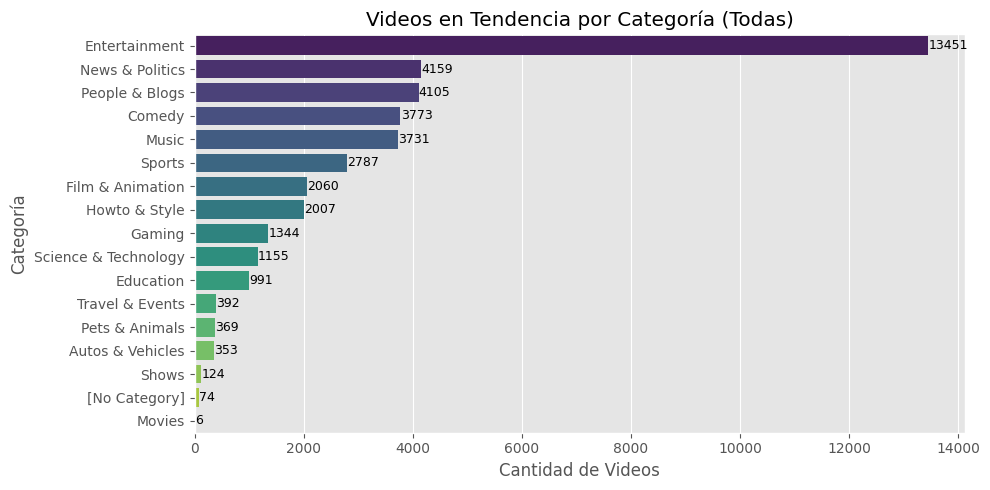


Cantidad de videos por categoría (todas):


,Categoría,Cantidad
0,Entertainment,13451
1,News & Politics,4159
2,People & Blogs,4105
3,Comedy,3773
4,Music,3731
5,Sports,2787
6,Film & Animation,2060
7,Howto & Style,2007
8,Gaming,1344
9,Science & Technology,1155


In [81]:
# Gráfico de TODAS las categorías
with warnings.catch_warnings(): 
    warnings.simplefilter("ignore") #Ignorar las warnings (Graficas mas limpias :D)

    category_counts_all = df['category'].value_counts().sort_values(ascending=False).reset_index()
    category_counts_all.columns = ['Categoría', 'Cantidad']

    ax = sns.barplot(data=category_counts_all, x='Cantidad', y='Categoría', palette='viridis')

    # Añadir etiquetas encima de cada barra
    for i, (value, name) in enumerate(zip(category_counts_all['Cantidad'], category_counts_all['Categoría'])):
        ax.text(value + 5, i, str(value), va='center', fontsize=9)

    plt.title('Videos en Tendencia por Categoría (Todas)')
    plt.xlabel('Cantidad de Videos')
    plt.ylabel('Categoría')
    plt.tight_layout()
    plt.show()
    
# Conteo de todas las categorías
category_counts_all = df['category'].value_counts().sort_values(ascending=False).reset_index()
category_counts_all.columns = ['Categoría', 'Cantidad']
print("\nCantidad de videos por categoría (todas):")
display(category_counts_all)

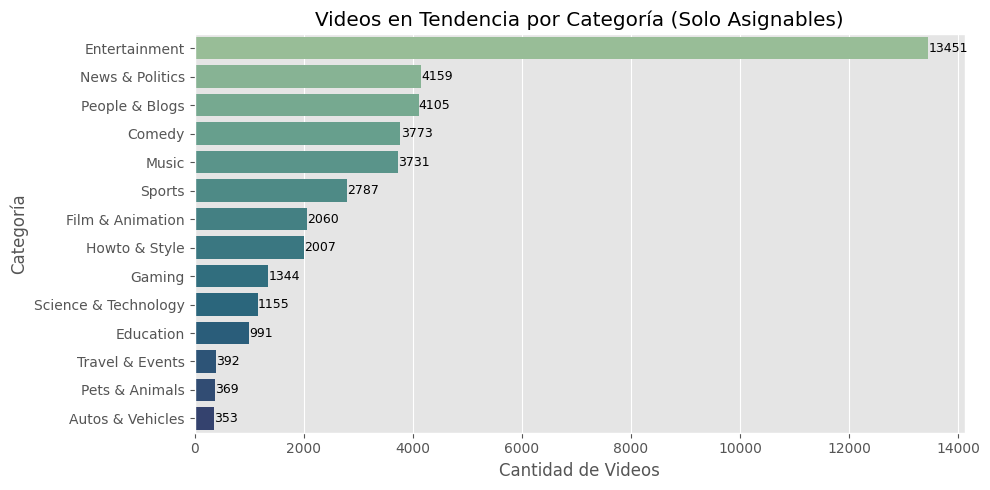


Cantidad de videos por categoría (solo asignables):


,Categoría,Cantidad
0,Entertainment,13451
1,News & Politics,4159
2,People & Blogs,4105
3,Comedy,3773
4,Music,3731
5,Sports,2787
6,Film & Animation,2060
7,Howto & Style,2007
8,Gaming,1344
9,Science & Technology,1155


In [82]:
# Gráfico SOLO categorías asignables
with warnings.catch_warnings():
    warnings.simplefilter("ignore") #Ignorar las warnings (Graficas mas limpias :D)

    assignable_df = df[df['assignable_category'] == True]
    category_counts_assignable = assignable_df['category'].value_counts().sort_values(ascending=False).reset_index()
    category_counts_assignable.columns = ['Categoría', 'Cantidad']

    ax = sns.barplot(data=category_counts_assignable, x='Cantidad', y='Categoría', palette='crest')

    for i, (value, name) in enumerate(zip(category_counts_assignable['Cantidad'], category_counts_assignable['Categoría'])):
        ax.text(value + 5, i, str(value), va='center', fontsize=9)

    plt.title('Videos en Tendencia por Categoría (Solo Asignables)')
    plt.xlabel('Cantidad de Videos')
    plt.ylabel('Categoría')
    plt.tight_layout()
    plt.show()
    
#Conteo solo de categorías asignables
assignable_df = df[df['assignable_category'] == True]
category_counts_assignable = assignable_df['category'].value_counts().sort_values(ascending=False).reset_index()
category_counts_assignable.columns = ['Categoría', 'Cantidad']
print("\nCantidad de videos por categoría (solo asignables):")
display(category_counts_assignable)

# PREGUNTA 2
### 2. ¿Qué categorías de videos son los que más gustan? ¿Y las que menos gustan?

In [84]:
#Dataframe de categorias
category_stats_all = df.groupby('category').agg(
    total_videos=('video_id', 'count'),
    total_likes=('likes', 'sum'),
    total_dislikes=('dislikes', 'sum'),
    avg_likes=('likes', 'mean'),
    avg_dislikes=('dislikes', 'mean')
).reset_index()

print("Estadísticas por categoría (Todas):")
display(category_stats_all.sort_values('avg_likes', ascending=False))

Estadísticas por categoría (Todas):


,category,total_videos,total_likes,total_dislikes,avg_likes,avg_dislikes
8,Music,3731,564447530,22098190,151285.856339,5922.859823
16,[No Category],74,10242613,2325807,138413.689189,31429.824324
1,Comedy,3773,196046674,5372515,51960.422475,1423.937185
7,Movies,6,252905,12280,42150.833333,2046.666667
5,Gaming,1344,51726552,2446882,38487.017857,1820.596726
4,Film & Animation,2060,77802003,3111259,37767.962621,1510.319903
12,Science & Technology,1155,42814598,1791153,37068.916017,1550.781818
3,Entertainment,13451,387245433,25791583,28789.341536,1917.447253
10,People & Blogs,4105,105388564,9480796,25673.219001,2309.572716
6,Howto & Style,2007,51183104,1730520,25502.293971,862.242152


In [85]:
#Dataframe de categorias asignables
assignable_df = df[df['assignable_category'] == True]

category_stats_assignable = assignable_df.groupby('category').agg(
    total_videos=('video_id', 'count'),
    total_likes=('likes', 'sum'),
    total_dislikes=('dislikes', 'sum'),
    avg_likes=('likes', 'mean'),
    avg_dislikes=('dislikes', 'mean')
).reset_index()

print("Estadísticas por categoría (Solo asignables):")
display(category_stats_assignable.sort_values('avg_likes', ascending=False))

Estadísticas por categoría (Solo asignables):


,category,total_videos,total_likes,total_dislikes,avg_likes,avg_dislikes
7,Music,3731,564447530,22098190,151285.856339,5922.859823
1,Comedy,3773,196046674,5372515,51960.422475,1423.937185
5,Gaming,1344,51726552,2446882,38487.017857,1820.596726
4,Film & Animation,2060,77802003,3111259,37767.962621,1510.319903
11,Science & Technology,1155,42814598,1791153,37068.916017,1550.781818
3,Entertainment,13451,387245433,25791583,28789.341536,1917.447253
9,People & Blogs,4105,105388564,9480796,25673.219001,2309.572716
6,Howto & Style,2007,51183104,1730520,25502.293971,862.242152
10,Pets & Animals,369,8830736,185003,23931.533875,501.363144
12,Sports,2787,59449419,3286369,21330.972013,1179.177969


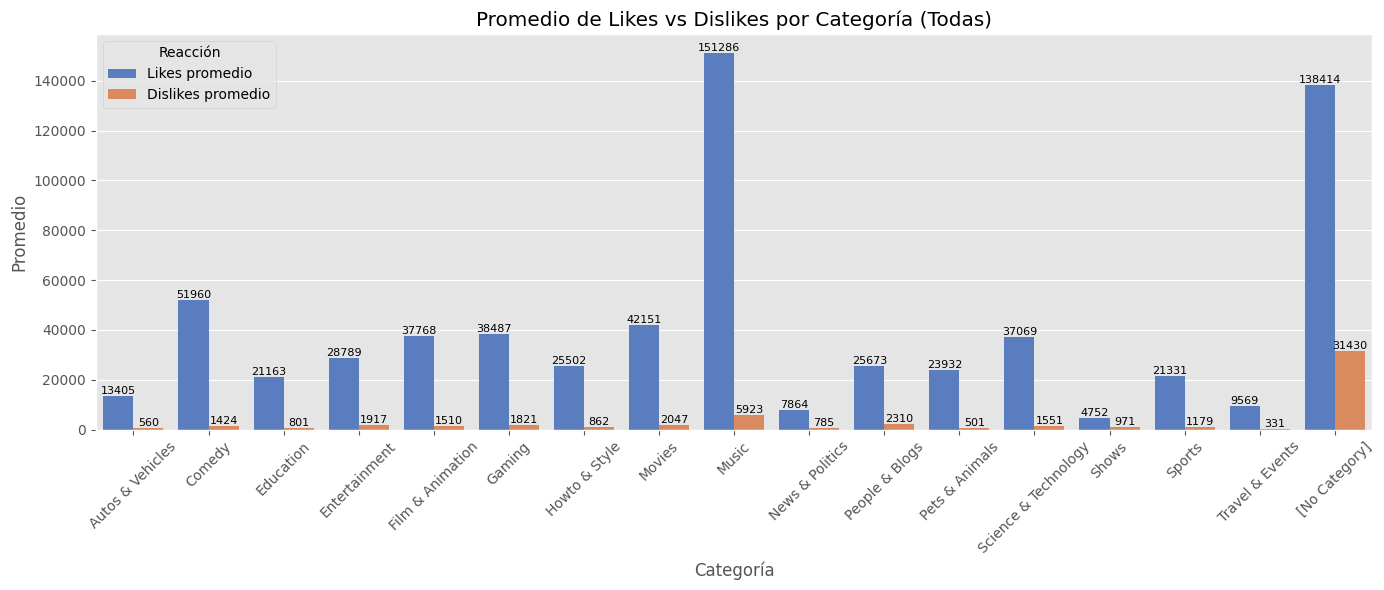

In [86]:
# Promedios de likes y dislikes por categoría (todas)
likes_dislikes_all = category_stats_all.melt(
    id_vars='category',
    value_vars=['avg_likes', 'avg_dislikes'],
    var_name='Reacción',
    value_name='Promedio'
)

# Renombrar para mejor lectura
likes_dislikes_all['Reacción'] = likes_dislikes_all['Reacción'].replace({
    'avg_likes': 'Likes promedio',
    'avg_dislikes': 'Dislikes promedio'
})

# Gráfico para TODAS las categorías
plt.figure(figsize=(14, 6))
ax = sns.barplot(data=likes_dislikes_all, x='category', y='Promedio', hue='Reacción', palette='muted')

# Añadir número encima de cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=8)

plt.title('Promedio de Likes vs Dislikes por Categoría (Todas)')
plt.xlabel('Categoría')
plt.ylabel('Promedio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

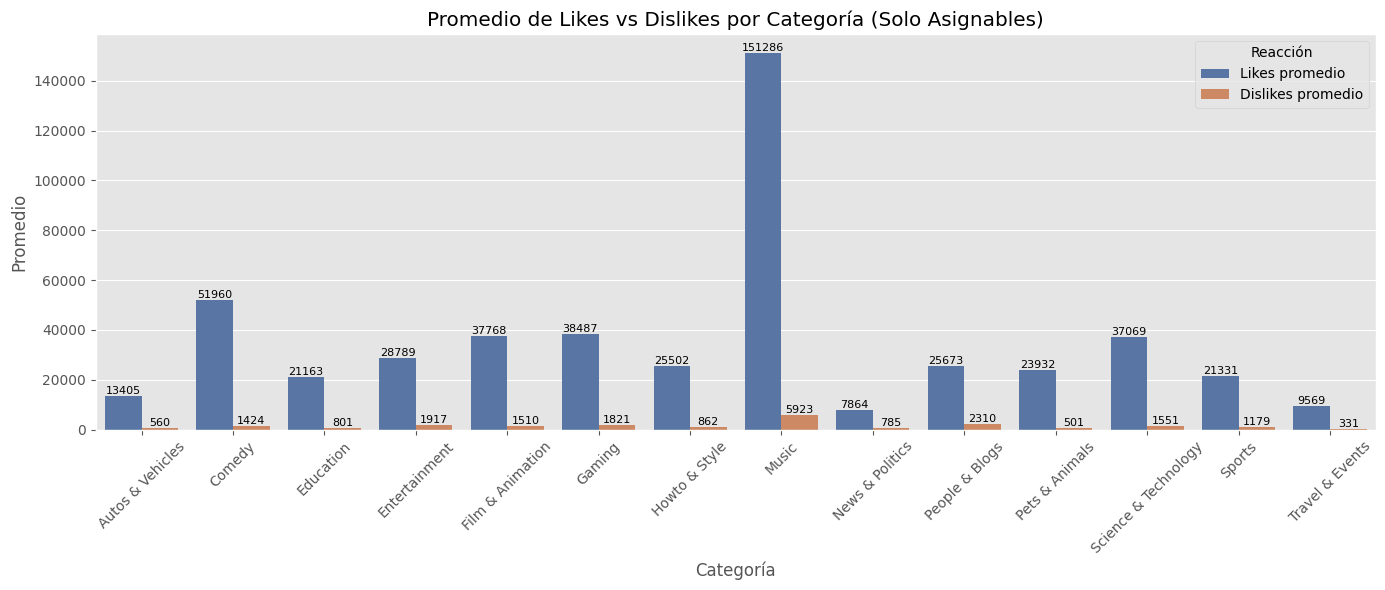

In [87]:
# Promedios solo para categorías asignables
likes_dislikes_assignable = category_stats_assignable.melt(
    id_vars='category',
    value_vars=['avg_likes', 'avg_dislikes'],
    var_name='Reacción',
    value_name='Promedio'
)

likes_dislikes_assignable['Reacción'] = likes_dislikes_assignable['Reacción'].replace({
    'avg_likes': 'Likes promedio',
    'avg_dislikes': 'Dislikes promedio'
})

#Gráfico para SOLO categorías asignables
plt.figure(figsize=(14, 6))
ax = sns.barplot(data=likes_dislikes_assignable, x='category', y='Promedio', hue='Reacción', palette='deep')

# Añadir número encima de cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=8)

plt.title('Promedio de Likes vs Dislikes por Categoría (Solo Asignables)')
plt.xlabel('Categoría')
plt.ylabel('Promedio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# PREGUNTA 3
### 3. ¿Qué categorías de videos tienen la mejor proporción (ratio) de “Me gusta” / “No megusta”?


In [88]:
#DataFrame para TODAS las categorías

ratio_all = df.groupby('category')['like_dislike_ratio'].mean().reset_index()
ratio_all.columns = ['Categoría', 'Ratio promedio']
ratio_all = ratio_all.sort_values(by='Ratio promedio', ascending=False)

print("Promedio de ratio Like/Dislike por categoría (Todas):")
display(ratio_all)

Promedio de ratio Like/Dislike por categoría (Todas):


,Categoría,Ratio promedio
11,Pets & Animals,75.134222
5,Gaming,72.271736
6,Howto & Style,67.445786
1,Comedy,60.605092
8,Music,52.382317
2,Education,50.684319
0,Autos & Vehicles,47.766969
10,People & Blogs,45.805529
4,Film & Animation,44.528155
15,Travel & Events,44.416475


In [89]:
#DataFrame para SOLO categorías asignables
assignable_df = df[df['assignable_category'] == True]
ratio_assignable = assignable_df.groupby('category')['like_dislike_ratio'].mean().reset_index()
ratio_assignable.columns = ['Categoría', 'Ratio promedio']
ratio_assignable = ratio_assignable.sort_values(by='Ratio promedio', ascending=False)

print("Promedio de ratio Like/Dislike por categoría (Solo asignables):")
display(ratio_assignable)

Promedio de ratio Like/Dislike por categoría (Solo asignables):


,Categoría,Ratio promedio
10,Pets & Animals,75.134222
5,Gaming,72.271736
6,Howto & Style,67.445786
1,Comedy,60.605092
7,Music,52.382317
2,Education,50.684319
0,Autos & Vehicles,47.766969
9,People & Blogs,45.805529
4,Film & Animation,44.528155
13,Travel & Events,44.416475


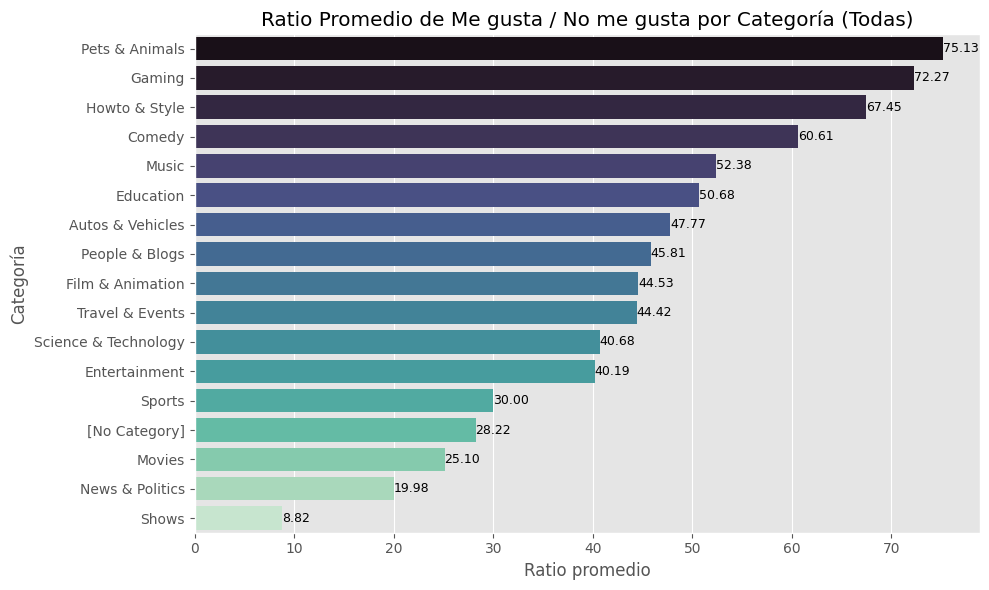

In [90]:

#Gráfico para TODAS las categorías
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=ratio_all, x='Ratio promedio', y='Categoría', palette='mako')

    # Añadir etiquetas con el valor
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=9)

    plt.title('Ratio Promedio de Me gusta / No me gusta por Categoría (Todas)')
    plt.xlabel('Ratio promedio')
    plt.ylabel('Categoría')
    plt.tight_layout()
    plt.show()

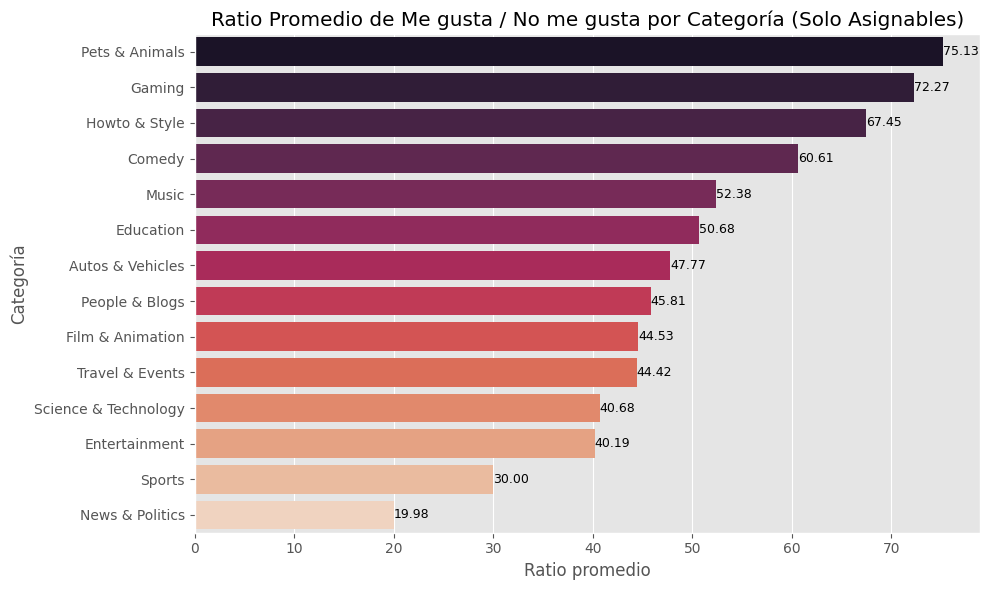

In [91]:
#Gráfico para SOLO categorías asignables
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=ratio_assignable, x='Ratio promedio', y='Categoría', palette='rocket')

    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=9)

    plt.title('Ratio Promedio de Me gusta / No me gusta por Categoría (Solo Asignables)')
    plt.xlabel('Ratio promedio')
    plt.ylabel('Categoría')
    plt.tight_layout()
    plt.show()

# EXTRA
### Scatter Plot de Likes/Dislikes

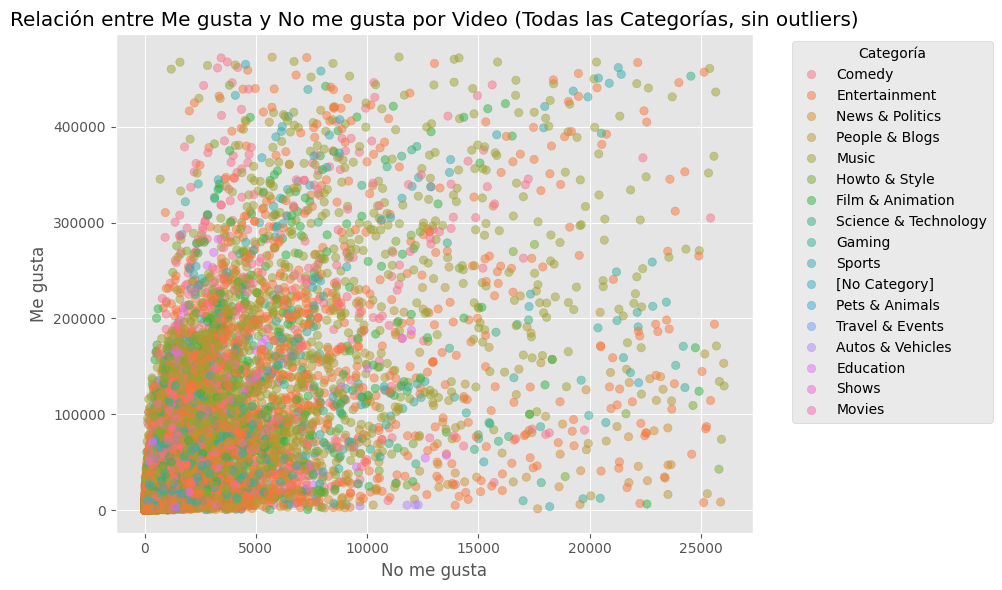

In [92]:
# Todos los videos

# Quitamos el 0.1%
likes_cap = df['likes'].quantile(0.99)
dislikes_cap = df['dislikes'].quantile(0.99)
filtered_df = df[(df['likes'] < likes_cap) & (df['dislikes'] < dislikes_cap)]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='dislikes', y='likes', hue='category', alpha=0.5, edgecolor=None)
plt.title('Relación entre Me gusta y No me gusta por Video (Todas las Categorías, sin outliers)')
plt.xlabel('No me gusta')
plt.ylabel('Me gusta')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Categoría')
plt.tight_layout()
plt.show()

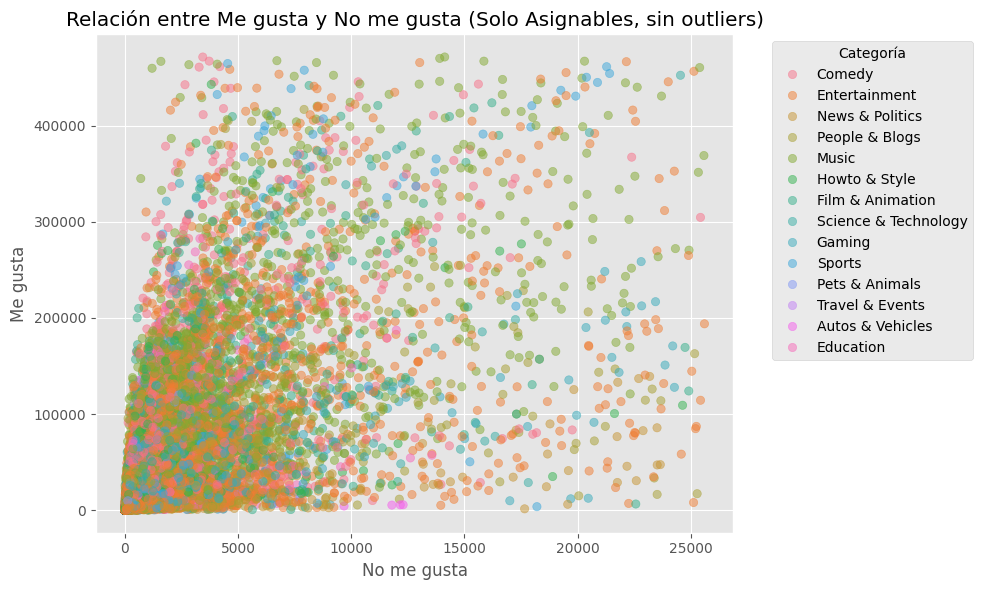

In [93]:
# Solo categorías asignables

# Quitamos el 0.1%
likes_cap = assignable_df['likes'].quantile(0.99)
dislikes_cap = assignable_df['dislikes'].quantile(0.99)

# Filtro de outliers
filtered_assignable = assignable_df[
    (assignable_df['likes'] < likes_cap) &
    (assignable_df['dislikes'] < dislikes_cap)
]

# Scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=filtered_assignable,
    x='dislikes',
    y='likes',
    hue='category',
    alpha=0.5,
    edgecolor=None
)
plt.title('Relación entre Me gusta y No me gusta (Solo Asignables, sin outliers)')
plt.xlabel('No me gusta')
plt.ylabel('Me gusta')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Categoría')
plt.tight_layout()
plt.show()

# PREGUNTA 4
### 4. ¿Qué categorías de videos tienen la mejor proporción (ratio) de “Vistas” /“Comentarios”?

In [94]:
# Dataframe para TODAS las categorías
ratio_all = df.groupby('category')['views_comments_ratio'].mean().reset_index()
ratio_all.columns = ['Categoría', 'Ratio promedio']
ratio_all = ratio_all.sort_values(by='Ratio promedio', ascending=False)

print("Promedio del ratio Vistas / Comentarios por categoría (Todas):")
display(ratio_all)

Promedio del ratio Vistas / Comentarios por categoría (Todas):


,Categoría,Ratio promedio
10,People & Blogs,65485.621805
12,Science & Technology,41566.226601
9,News & Politics,29566.615854
3,Entertainment,18125.271898
4,Film & Animation,12681.641058
8,Music,9773.772728
16,[No Category],6597.782749
0,Autos & Vehicles,6089.252412
14,Sports,5642.518455
5,Gaming,2654.338676


In [95]:
# Tabla para SOLO categorías asignables
assignable_df = df[df['assignable_category'] == True]
ratio_assignable = assignable_df.groupby('category')['views_comments_ratio'].mean().reset_index()
ratio_assignable.columns = ['Categoría', 'Ratio promedio']
ratio_assignable = ratio_assignable.sort_values(by='Ratio promedio', ascending=False)

print("Promedio del ratio Vistas / Comentarios por categoría (Solo asignables):")
display(ratio_assignable)

Promedio del ratio Vistas / Comentarios por categoría (Solo asignables):


,Categoría,Ratio promedio
9,People & Blogs,65485.621805
11,Science & Technology,41566.226601
8,News & Politics,29566.615854
3,Entertainment,18125.271898
4,Film & Animation,12681.641058
7,Music,9773.772728
0,Autos & Vehicles,6089.252412
12,Sports,5642.518455
5,Gaming,2654.338676
6,Howto & Style,2653.594899


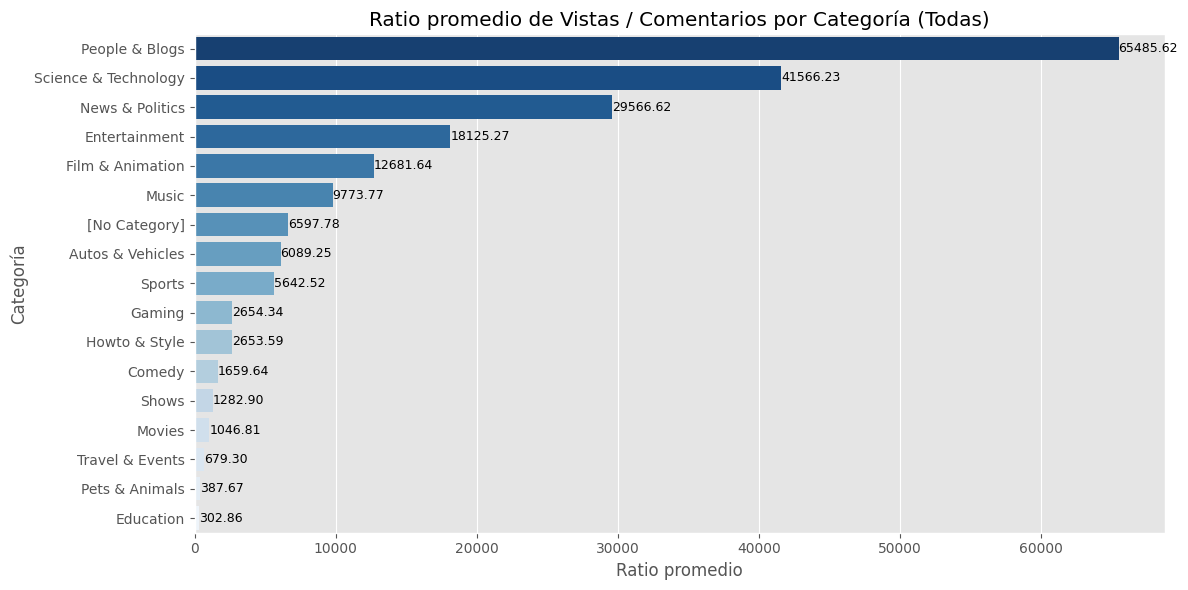

In [96]:
# Gráfico para TODAS las categorías
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(data=ratio_all, x='Ratio promedio', y='Categoría', palette='Blues_r')

    # Números encima de las barras
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=9)

    plt.title('Ratio promedio de Vistas / Comentarios por Categoría (Todas)')
    plt.xlabel('Ratio promedio')
    plt.ylabel('Categoría')
    plt.tight_layout()
    plt.show()

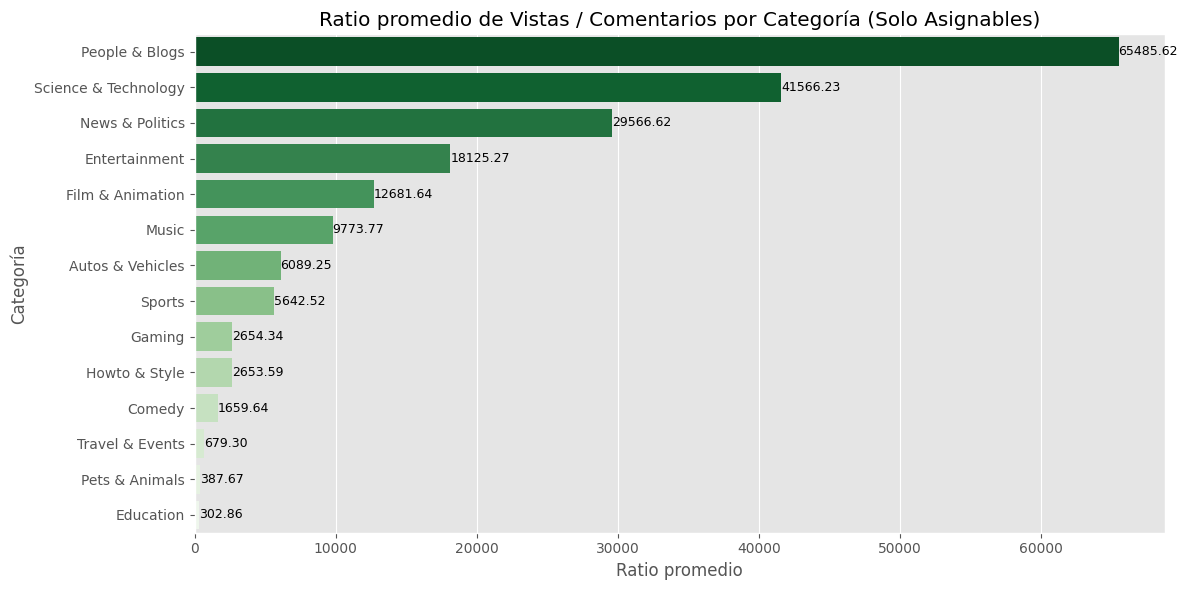

In [97]:
# Gráfico para SOLO categorías asignables
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(data=ratio_assignable, x='Ratio promedio', y='Categoría', palette='Greens_r')

    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=9)

    plt.title('Ratio promedio de Vistas / Comentarios por Categoría (Solo Asignables)')
    plt.xlabel('Ratio promedio')
    plt.ylabel('Categoría')
    plt.tight_layout()
    plt.show()

# PREGUNTA 5
### 5. ¿Cómo ha cambiado el volumen de los videos en tendencia a lo largo del tiempo?

Volumen de videos en tendencia por mes:


,Mes,Cantidad de Videos
0,2017-11,3398
1,2017-12,6194
2,2018-01,5784
3,2018-02,5556
4,2018-03,6188
5,2018-04,4794
6,2018-05,6167
7,2018-06,2800


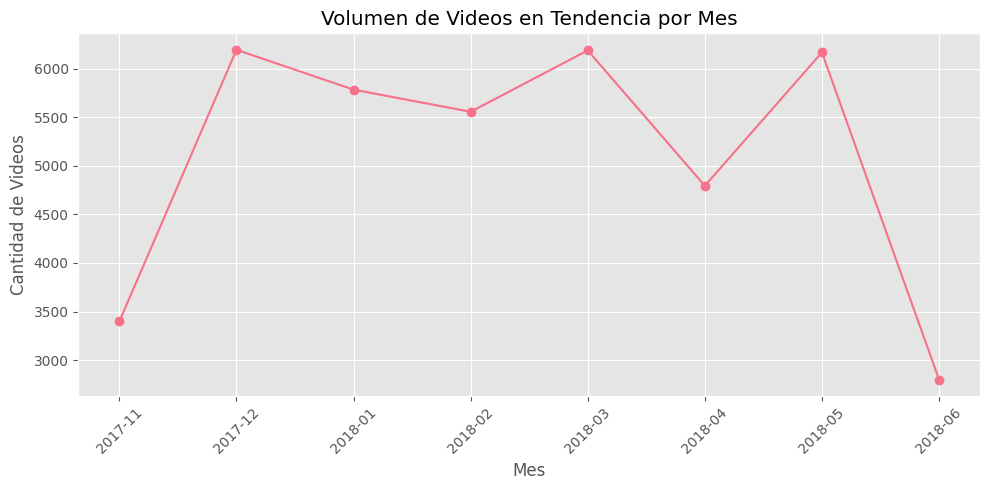

In [98]:
df['trending_date'] = pd.to_datetime(df['trending_date'], errors='coerce')

# Extraer año-mes como string
df['trending_month'] = df['trending_date'].dt.strftime('%Y-%m')

# Conteo por mes
trend_volume = df['trending_month'].value_counts().sort_index()

# Mostrar tabla
trend_volume_df = trend_volume.reset_index()
trend_volume_df.columns = ['Mes', 'Cantidad de Videos']
print("Volumen de videos en tendencia por mes:")
display(trend_volume_df)

# Gráfico
plt.figure(figsize=(10, 5))
plt.plot(trend_volume.index, trend_volume.values, marker='o', linestyle='-')
plt.title('Volumen de Videos en Tendencia por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Videos')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# PREGUNTA 6
### 6. ¿Qué Canales de YouTube son tendencia más frecuentemente? ¿Y cuáles con menos frecuencia?


Top 20 canales con más videos en tendencia:


,Canal,Cantidad
0,SET India,192
1,MSNBC,189
2,FBE,188
3,The Young Turks,186
4,REACT,183
5,VikatanTV,182
6,CNN,182
7,The Late Show with Stephen Colbert,172
8,RadaanMedia,168
9,ARY Digital,168


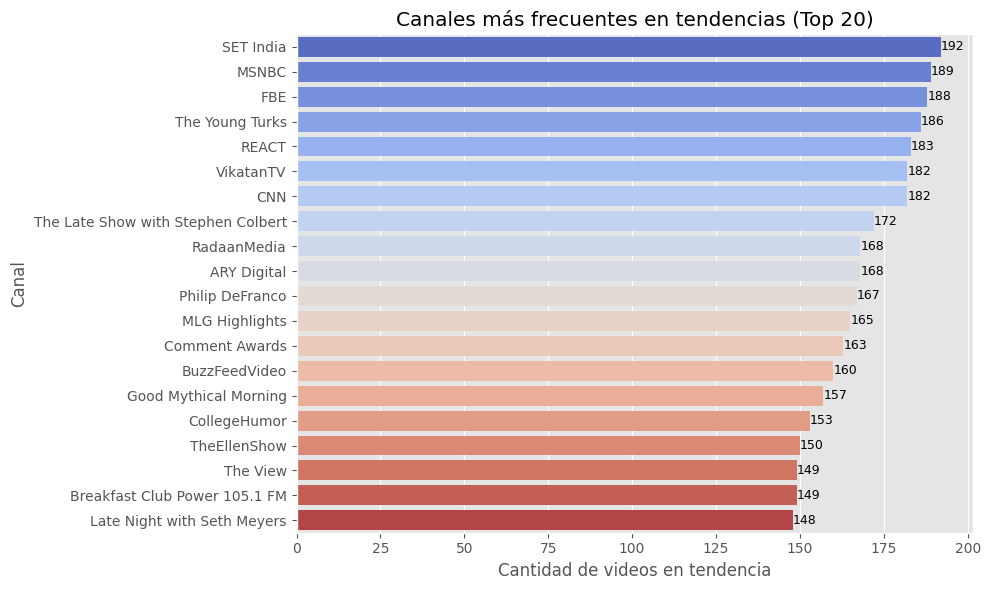

In [99]:
# Obtener top 20 canales por frecuencia en tendencias

top_channels = df['channel_title'].value_counts().head(20).reset_index()
top_channels.columns = ['Canal', 'Cantidad']
print("Top 20 canales con más videos en tendencia:")
display(top_channels)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=top_channels, x='Cantidad', y='Canal', palette='coolwarm')

    # Añadir etiquetas
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9)

    plt.title('Canales más frecuentes en tendencias (Top 20)')
    plt.xlabel('Cantidad de videos en tendencia')
    plt.ylabel('Canal')
    plt.tight_layout()
    plt.show()

In [ ]:
#Mostrar tambien los canales con solo 1 video en tendencia
least_frequent_channels = df['channel_title'].value_counts()
least_frequent_df = least_frequent_channels[least_frequent_channels == 1].reset_index()
least_frequent_df.columns = ['Canal', 'Cantidad']

print(f"Cantidad de canales que solo aparecieron una vez en tendencia: {len(least_frequent_df)}")
display(least_frequent_df.head(11))  # Solo los primeros 11

Cantidad de canales que solo aparecieron una vez en tendencia: 1694


,Canal,Cantidad
0,DKDKTV,1
1,BasVEVO,1
2,ኤርትራዊነት,1
3,VOA Tiếng Việt,1
4,tbs 시민의 방송,1
5,GLP TV,1
6,Straits Times,1
7,FIBA3x3,1
8,Weird World,1
9,Household Hacker,1


# PREGUNTA 7
### 7. ¿En qué Estados se presenta el mayor número de “Vistas”, “Me gusta” y “No megusta”? 

Métricas totales por estado:


,state,views,likes,dislikes
6,Nova Scotia,3908374167,134322361,7322786
1,British Columbia,3900526242,148622590,6825012
0,Alberta,3888860952,135427475,7759834
5,Northwest Territories,3741698820,137867862,6912816
9,Prince Edward Island,3737800298,114561446,6982402
8,Ontario,3733666817,125585143,6578918
3,New Brunswick,3513128479,122154056,5477339
12,Yukon,3498078837,117762044,6114702
2,Manitoba,3435091655,118586523,5743359
10,Quebec,3431091134,123796800,5325817


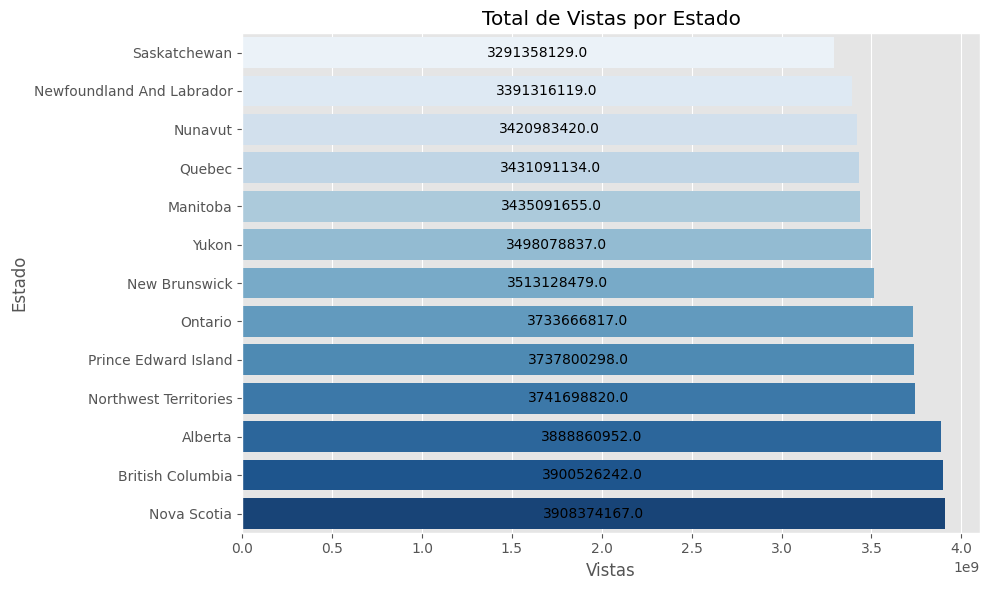

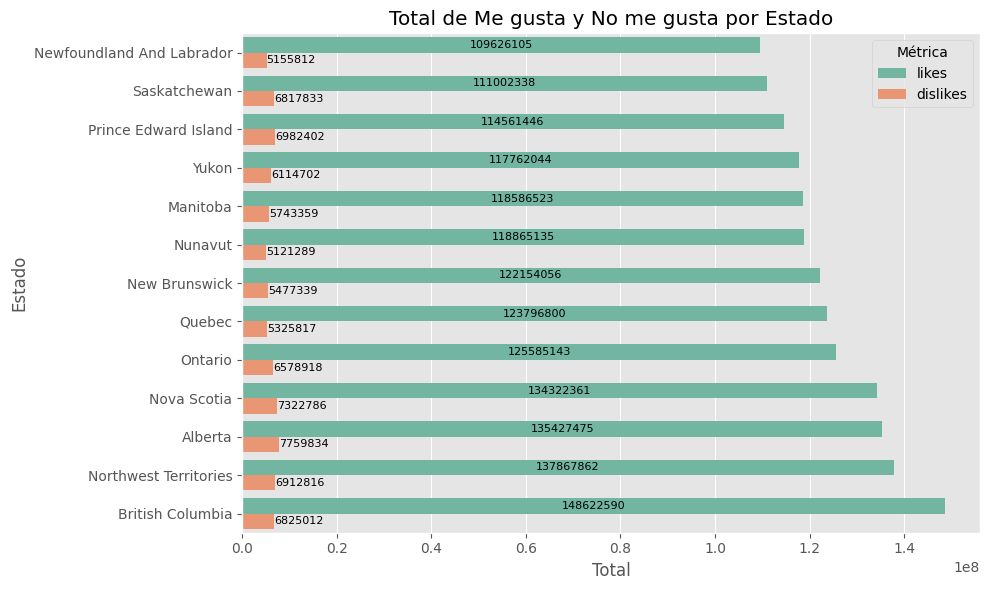

In [101]:
# Agrupar datos
state_metrics = df.groupby('state')[['views', 'likes', 'dislikes']].sum().reset_index()

# Mostrar tabla ordenada por vistas
print("Métricas totales por estado:")
display(state_metrics.sort_values(by='views', ascending=False))

# Gráfico de vistas
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    # Ordenar por vistas para mostrar de mayor a menor
    views_sorted = state_metrics.sort_values('views', ascending=True)
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=views_sorted, x='views', y='state', palette='Blues')

    for i, v in enumerate(views_sorted['views']):
        ax.text(v / 2, i, f'{v:.1f}', color='Black', ha='center', va='center')

    plt.title('Total de Vistas por Estado')
    plt.xlabel('Vistas')
    plt.ylabel('Estado')
    plt.tight_layout()
    plt.show()

# Gráfico de likes y dislikes
likes_dislikes_melt = state_metrics.melt(
    id_vars='state',
    value_vars=['likes', 'dislikes'],
    var_name='Métrica',
    value_name='Total'
)

state_order = state_metrics.sort_values('likes', ascending=True)['state']

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=likes_dislikes_melt,
    x='Total',
    y='state',
    hue='Métrica',
    order=state_order,
    palette='Set2'
)

# Diferenciar entre likes y dislikes
for i, container in enumerate(ax.containers):
    label_type = 'center' if i == 0 else 'edge'  # 0 = likes, 1 = dislikes
    text_color = 'black' if label_type == 'center' else 'black'
    ax.bar_label(container, fmt='%.0f', label_type=label_type, fontsize=8, color=text_color)

plt.title('Total de Me gusta y No me gusta por Estado')
plt.xlabel('Total')
plt.ylabel('Estado')
plt.tight_layout()
plt.show()

In [102]:
#Mapa de GeoEngagement
if all(col in df.columns for col in ['lat', 'lon']):
    geo_engagement = df.groupby(['state', 'lat', 'lon'])[['views', 'likes', 'dislikes']].sum().reset_index()

    fig = px.scatter_map(
        geo_engagement,
        lat='lat',
        lon='lon',
        size='views',
        color='likes',
        hover_name='state',
        hover_data={'views': True, 'likes': True, 'dislikes': True},
        color_continuous_scale='Viridis',
        size_max=40,
        zoom=3.5,
        height=600
    )

    fig.update_layout(mapbox_style='carto-positron')
    fig.update_layout(title='Mapa de Engagement por Estado (Canadá)')
    fig.show()

else:
    print("No se encontraron columnas 'lat' y 'lon'.")

# PREGUNTA 8
### 8. ¿Los videos en tendencia son los que mayor cantidad de comentarios positivos reciben?

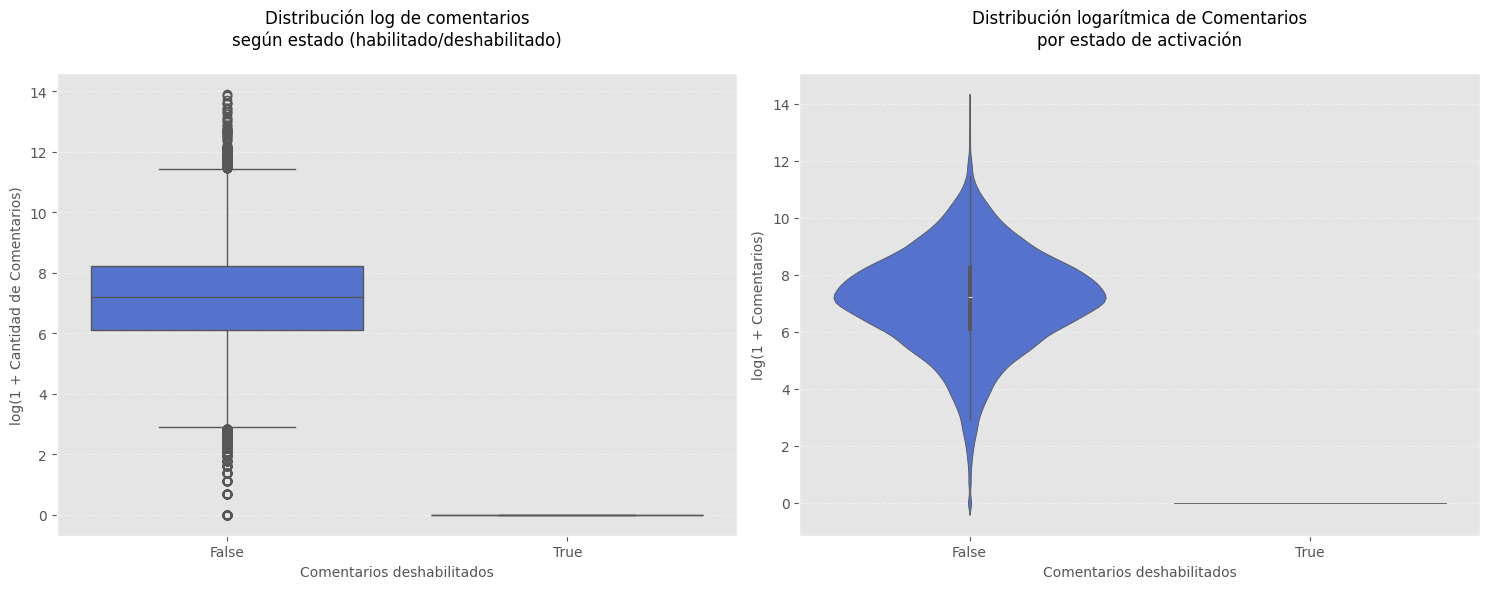

In [109]:
# Crear variable logarítmica para comentarios
df['log_comment_count'] = np.log1p(df['comment_count'])

# Crear figura con dos subplots lado a lado
plt.figure(figsize=(15, 6))  # Ancho doble para acomodar ambos gráficos

# Boxplot - primer gráfico
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, posición 1
sns.boxplot(data=df, x='comments_disabled', y='log_comment_count', 
            color='royalblue')
plt.title('Distribución log de comentarios\nsegún estado (habilitado/deshabilitado)', 
          fontsize=12, pad=20)
plt.xlabel('Comentarios deshabilitados', fontsize=10)
plt.ylabel('log(1 + Cantidad de Comentarios)', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Violinplot - segundo gráfico
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, posición 2
sns.violinplot(data=df, x='comments_disabled', y='log_comment_count', 
              color='royalblue')
plt.title('Distribución logarítmica de Comentarios\npor estado de activación', 
          fontsize=12, pad=20)
plt.xlabel('Comentarios deshabilitados', fontsize=10)
plt.ylabel('log(1 + Comentarios)', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.4)


# Ajustar layout y mostrar
plt.tight_layout()
plt.show()

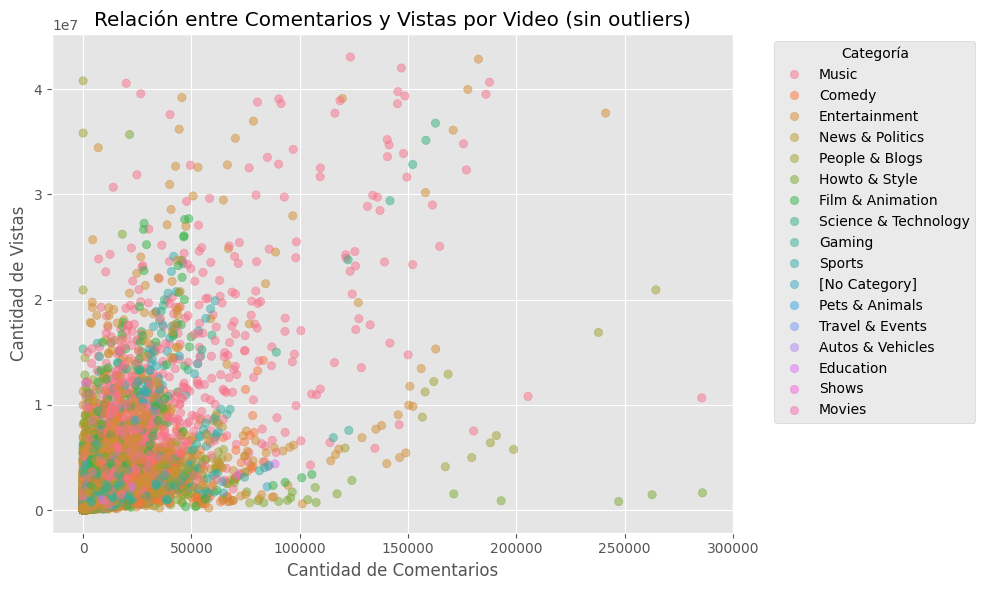

In [68]:
# Filtrar outliers (percentiles 0.1% - 99.9%)
q_low = df['comment_count'].quantile(0.001)
q_high = df['comment_count'].quantile(0.999)
v_low = df['views'].quantile(0.001)
v_high = df['views'].quantile(0.999)

filtered_df = df[
    (df['comment_count'] >= q_low) & (df['comment_count'] <= q_high) &
    (df['views'] >= v_low) & (df['views'] <= v_high)
]

# Gráfico
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='comment_count', y='views', hue='category', alpha=0.5, edgecolor=None)
plt.title('Relación entre Comentarios y Vistas por Video (sin outliers)')
plt.xlabel('Cantidad de Comentarios')
plt.ylabel('Cantidad de Vistas')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Categoría')
plt.tight_layout()
plt.show()

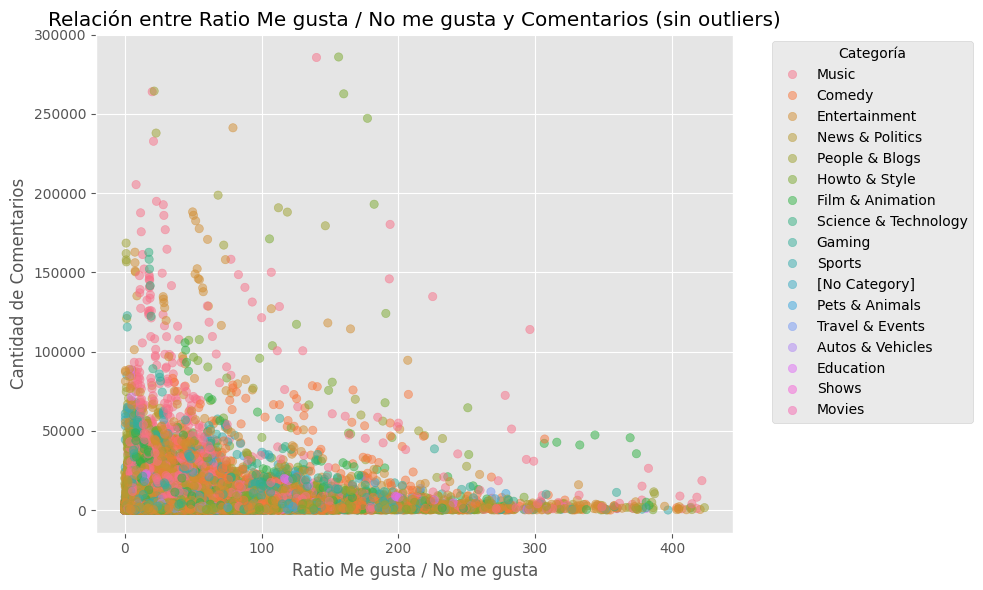

In [69]:
# Filtrar outliers (percentiles 0.2% - 99.8%)
ld_low = df['like_dislike_ratio'].quantile(0.002)
ld_high = df['like_dislike_ratio'].quantile(0.998)

filtered_df2 = df[
    (df['like_dislike_ratio'] >= ld_low) & (df['like_dislike_ratio'] <= ld_high) &
    (df['comment_count'] >= q_low) & (df['comment_count'] <= q_high)
]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df2, x='like_dislike_ratio', y='comment_count', hue='category', alpha=0.5, edgecolor=None)
plt.title('Relación entre Ratio Me gusta / No me gusta y Comentarios (sin outliers)')
plt.xlabel('Ratio Me gusta / No me gusta')
plt.ylabel('Cantidad de Comentarios')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Categoría')
plt.tight_layout()
plt.show()

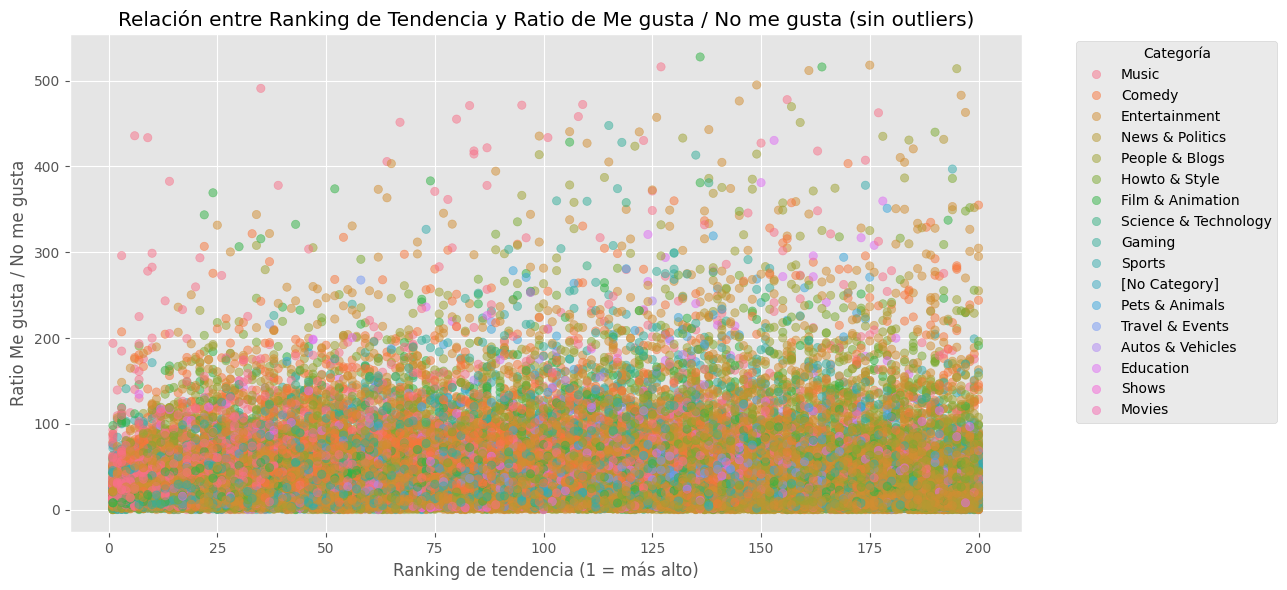

In [71]:
df['trend_rank'] = df.groupby('trending_date')['views'].rank(ascending=False)

# Filtro de outliers
ratio_low = df['like_dislike_ratio'].quantile(0.001)
ratio_high = df['like_dislike_ratio'].quantile(0.999)
rank_high = df['trend_rank'].quantile(0.999)

filtered_df = df[
    (df['like_dislike_ratio'] >= ratio_low) &
    (df['like_dislike_ratio'] <= ratio_high) &
    (df['trend_rank'] <= rank_high)
]

# Gráfico
plt.figure(figsize=(13, 6))
sns.scatterplot(
    data=filtered_df,
    x='trend_rank',
    y='like_dislike_ratio',
    hue='category',
    alpha=0.5,
    edgecolor=None
)
plt.title('Relación entre Ranking de Tendencia y Ratio de Me gusta / No me gusta (sin outliers)')
plt.xlabel('Ranking de tendencia (1 = más alto)')
plt.ylabel('Ratio Me gusta / No me gusta')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Categoría')
plt.tight_layout()
plt.show()

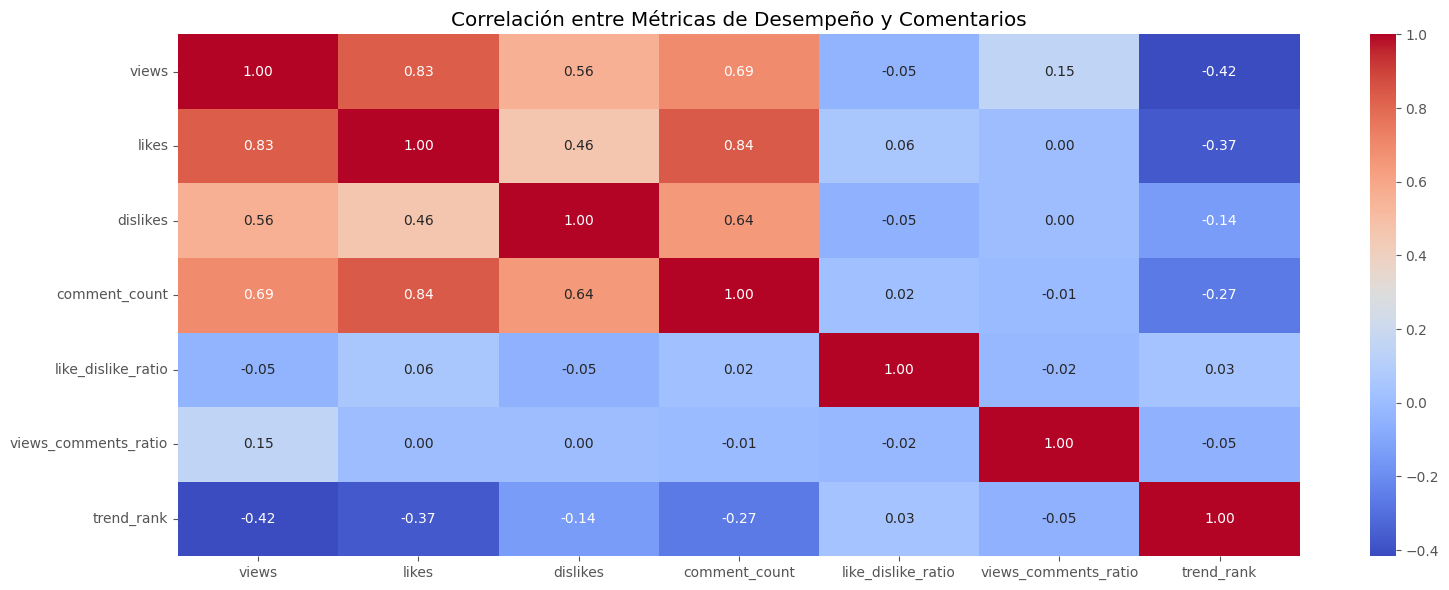

In [72]:
# Selección de métricas relevantes
corr_vars = df[['views', 'likes', 'dislikes', 'comment_count', 'like_dislike_ratio', 'views_comments_ratio','trend_rank']]

# Matriz de correlación
correlation_matrix = corr_vars.corr()

plt.figure(figsize=(16, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    xticklabels=correlation_matrix.columns,
    yticklabels=correlation_matrix.columns,
    cbar=True
)
plt.title('Correlación entre Métricas de Desempeño y Comentarios')
plt.tight_layout()
plt.show()